

# COGS 108 - Final Project

# Overview

## TODO


# Names
Joyaan Bhesania
Navid Nezamabadi
Jonathan Titus
Garo Adjoian
Juan Sandoval

# Group Members IDs
A13494425

## TODO

# Research Question
Fill in your research question here

# Background and Prior Work
The data that the team intends to use for analysis is an amalgamation of data from four primary datasets. The Human Development Index (HDI) data was pulled from the United Nations Development Program database, while the GDP and GDP per/capita came from the World Bank, and the figures for global suicide rates came from the World Health Organization & “Suicide in the Twenty-First Century” (Szamil, 2017). The four different sources provided data on their respective fields from the mid-1980's until the mid-2010’s. It is worth noting that in their analysis, the World Health Organization & Szamil both based their findings on age-standardized suicide rates done in suicides per/100,000 population to properly assess the global situation. These initial reports showed that men were much more prone to commit suicide than their female counter parts, young people were not particularly at risk to commit suicide when compared to other age groups regardless of country, and that overall global sucide rates were going down. In relating GDP to suicide rates, the group sought reference from prior studies including “Relationship of suicide rates to economic variables in Europe: 2000–2011” (by The British Journal of Psychiatry) and “Worldwide impact of economic cycles on suicide trends over 3 decades: differences according to level of development. A mixed effect model study” (by BMJ Journals). 

In their report, BMJ constasted the PPP (purchasing power parity) adjusted GDP per/capita with the suicide rates of countries grouped by the “Global Burden of Disease Study’s regional classification system”. They reported that in most of Latin America, Southeastern Asia and China/Korea/Japan there was a visible positive correlation between an increase in PPP per capita and suicide rates. Conversely, they reported that in the more developed Western Nations (Western&Central Europe and North America) there appeared to be a negative correlation between an increase in PPP per capita and suicide rates. The report went on to state there was no significant observable correlation between the two variables in sub-Saharan Africa and the Middle East/North Africa. The report stated that fast economic growth unaccompanied by strengthened socioeconomic and state institutions was likely reason for this phenomena in the developing world. Lastly, BMJ’s report acknowledged some of the studies shortcomings, notably not being able to account for microsocioecnomic confounding factors such as: unemployment rate, divorce rate, urban/rural divide, and alcohol consumption rate. 

Contrary to the findings of the BJM, the British Journal of Psychiatry was unable to correlate GDP per capita to suicide rates. They gathered data from 29 European countries consisting of suicide rates in males and females, unemployment rates, GDP per capita, economic growth rate per annum and inflation. They found that for males all of the aforementioned economic factors were correlated with suicide except GDP per capita. The findings were even less significant for females, where it was discovered that only the unemployment rate was correlated with the suicide rate. However, the authors did acknowledge that the study was based on aggregated data from each nation’s respective statistical agencies which would result in asymmetric data from various nations leading to possible “cross-level” and “aggregate bias” in the report’s findings. 

References (include links):

1) https://bmjopen.bmj.com/content/2/3/e000785 

2) https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/relationship-of-suicide-rates-to-economic-variables-in-europe-20002011/BED5FCDDA918CE73A5390249B83F0C57 

# Hypothesis
Fill in your hypotheses here


# Dataset(s)
Fill in your dataset information here

(Copy this information for each dataset)

Dataset Name:
Link to the dataset:
Number of observations:
1-2 sentences describing each dataset.

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df_init = pd.read_csv("master.csv")
df_HDI = pd.read_csv("Human development index (HDI).csv", encoding ='latin1')

In [2]:
df_init.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Data Cleaning

In [3]:
df_HDI.Country = df_HDI.Country.str.lstrip()

In [4]:
df_HDI = pd.melt(df_HDI, id_vars=["Country"], var_name=['Year'],value_name="HDI")
df_HDI = df_HDI.sort_values(["Country", "Year"])
df_HDI = df_HDI.reset_index(drop=True)

In [5]:
for index, row in df_HDI.iterrows():
    df_init.loc[(df_init['country'] == row['Country']) & (df_init['year'] == int(row['Year'])), 'HDI for year'] = row['HDI']

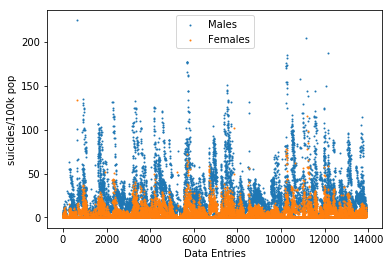

In [6]:
data = df_init

males = data[data['sex'] == 'male']
females = data[data['sex'] != 'male']

men_mean = pd.DataFrame.mean(males['suicides/100k pop'])
men_median = pd.DataFrame.median(males['suicides/100k pop'])
men_max = pd.DataFrame.max(males['suicides/100k pop'])

plt.scatter(range(len(males['suicides/100k pop'])), males['suicides/100k pop'], s = 1,)
plt.scatter(range(len(males['suicides/100k pop'])), females['suicides/100k pop'], s = 1)
plt.xlabel('Data Entries')
plt.ylabel('suicides/100k pop')
plt.legend(('Males', 'Females'))
plt.show()

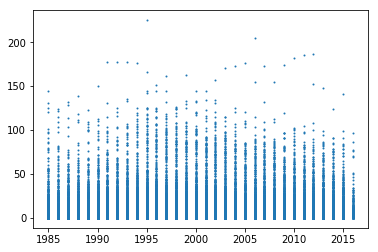

In [7]:
years = data[['year', 'suicides/100k pop']]
HDI = data[['year', 'HDI for year', 'suicides/100k pop']]
GDP = data[['year', ' gdp_for_year ($) ', 'suicides/100k pop']]
population = data[['year', 'population', 'suicides/100k pop']]
GDP_capita = data[['year', 'gdp_per_capita ($)', 'suicides/100k pop']]

years.dropna()
HDI.dropna()
GDP.dropna()
population.dropna()
GDP_capita.dropna()

years_list = years['year'].tolist()
years_suicide_list = years['suicides/100k pop'].tolist()
plt.scatter(years_list, years_suicide_list, s = 1)
plt.show()

In [14]:
strings = ['population', 'gdp_per_capita ($)', 'HDI for year']
genders = ['male', 'female']
years = [1985, 1990, 1995, 2000, 2005, 2010, 2015]
for gender in genders:
    print(gender)
    for string in strings:
        print('\t' + string)
        for year in years:
            tempdf = data[data['year'] == year]
            temp_df = tempdf[data['sex'] == gender]
            print('\t\t' + string + ':\t' + str(temp_df[string].corr(temp_df['suicides/100k pop'])))

male
	population
		population:	-0.02014846933119264
		population:	0.0064987564403225714
		population:	-0.007646227264073792
		population:	0.013158930262570447


C:\Users\Joyaan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


		population:	0.04660869944358628
		population:	0.018106294746037702
		population:	0.013459148655464563
	gdp_per_capita ($)
		gdp_per_capita ($):	0.10668881590980543
		gdp_per_capita ($):	0.21825340203222962
		gdp_per_capita ($):	0.002262885977475492
		gdp_per_capita ($):	-0.021051289863978827
		gdp_per_capita ($):	-0.05126470354371633
		gdp_per_capita ($):	-0.0008113524936120494
		gdp_per_capita ($):	-0.0004751076484407542
	HDI for year
		HDI for year:	0.15950985286860034
		HDI for year:	0.24569139667879605
		HDI for year:	0.022354539037448534
		HDI for year:	0.12796932430277877
		HDI for year:	0.13673696561943627
		HDI for year:	0.14328848677102993
		HDI for year:	0.16425666497278996
female
	population
		population:	0.027718527730775756
		population:	0.04973835332417464
		population:	0.014133198014114789
		population:	0.010949330949846207
		population:	0.05574557433830222
		population:	0.06918295038850418
		population:	0.05493609551070333
	gdp_per_capita ($)
		gdp_per_capita ($):	0.1

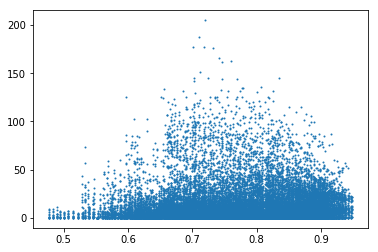

In [15]:
HDI_list = HDI['HDI for year'].tolist()
HDI_suicide_list = HDI['suicides/100k pop'].tolist()
plt.scatter(HDI_list, HDI_suicide_list, s = 1)
plt.show()

In [ ]:
GDP_list = GDP[' gdp_for_year ($) '].tolist()
GDP_suicide_list = GDP['suicides/100k pop'].tolist()
plt.scatter(GDP_list, GDP_suicide_list, s = 1)
plt.show()

In [ ]:
GDP_capita_list = GDP_capita['gdp_per_capita ($)'].tolist()
GDP_capita_suicide_list = GDP_capita['suicides/100k pop'].tolist()
plt.scatter(GDP_capita_list, GDP_capita_suicide_list, s = 1)
plt.show()

In [ ]:
population_list = population['population'].tolist()
population_suicide_list = population['suicides/100k pop'].tolist()
plt.scatter(population_list, population_suicide_list, s = 1)
plt.show()

In [ ]:
years_hist = years.hist(bins=29)
plt.show()
print()

#for i in range(29):
#	hist = GDP_capita[GDP_capita['year'] == 1985+i].hist(bins=50)
#	plt.show()


# Building Heat Map

In [ ]:
from collections import defaultdict
import pygal
from pygal_maps_world.maps import World

In [ ]:
country_codes = pd.read_csv("country_codes.csv", header=None, names=['Country Code', 'Country'])

In [ ]:
def generate_map(year, gender):
    df_temp = data.loc[(data['year'] <= year) & (data['age'] == '25-34 years') & (data['sex'] == gender)]
    heat_map = defaultdict(int)
    for index, rows in df_temp.iterrows():
        if rows['country'] in country_codes.Country.values:
            country_code = country_codes.loc[country_codes['Country'] == rows['country']]['Country Code'].values[0]
            if heat_map[country_code] != 0:
                continue
            else:
                heat_map[country_code] = abs(df_temp.loc[rows['country'] == df_temp['country']]['HDI for year'].corr(df_temp.loc[rows['country'] == df_temp['country']]['suicides/100k pop']))
    return heat_map

In [ ]:
world_map = World()
heat_map = generate_map(2015, 'male')
world_map.title = "Correlation between HDI and Suicide Rate for Young Adult Males"
world_map.add('1985-2015',heat_map)
world_map.render_to_file('heat_map.svg')

In [ ]:
from IPython.core.display import SVG

In [ ]:
SVG(filename='heat_map.svg')

In [ ]:
world_map_female = World()
heat_map_female = generate_map(2015, 'female')
world_map_female.title = "Correlation between HDI and Suicide Rate for Young Adult Females"
world_map_female.add('1985-2015',heat_map_female)
world_map_female.render_to_file('heat_map_female.svg')

In [ ]:
SVG(filename='heat_map_female.svg')

In [ ]:
data.head()

In [ ]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

data = data.dropna()
data.columns = data.columns.str.replace('HDI for year','HDI_for_year')
data.columns = data.columns.str.replace('suicides/100k pop','suicides_Per_100kpop')
data.head()
outcome, predictors = patsy.dmatrices('suicides_no ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())
outcome, predictors = patsy.dmatrices('suicides_Per_100kpop ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

Our goal was to see the correlation across genders and across age groups as we created a linear model and analyzed its factors. We first created a linear model based on age, sex, and HDI for the year to find the number of suicides. This showed us what we have already seen earlier, that being male increases your chances of commiting suicide greatly. However, it also showed us that the following age groups had the highest correlation to suicide numbers: 35-54, 55-74, 25-34, respectively. The remaining age groups, 75+ and 5-14, had a negative coefficient. However, when we performed the same linear analysis with the same factors but with suicide rate per 100k populaion instead of suicides numbers, we found quite different results for the 75+ age group. Since the number of people over 75 is low, their suicide rates were not accurately represented. When taking rates into account instead of numbers, they went from haing a negative coefficent to having the highest coefficient across all age groups. This is a more accurate representation, and our final ordering of age groups more correlated with suicide rates is 75+, 55-74, 35-54, 25-34, respectively in order from highest to lowest correlation.  